# Functions Travel First Class!

## 0. What you will learn

We will end up with the code shown below, which leads to a plot of unemployment rates in multiple American states. This example exercises all basic python concepts for data science..if you understand it you are golden! 

Finally, a homework problem will help cement your understanding, and make you even more dangerous!

Here is what the unemployment data looks like:


```
DATE,FLUR
1976-01-01,9.7
1976-02-01,9.7
1976-03-01,9.6
1976-04-01,9.5
1976-05-01,9.3
1976-06-01,9.2
1976-07-01,9.1
1976-08-01,9.1
1976-09-01,9.1
1976-10-01,9.1
1976-11-01,9.1
1976-12-01,9.1
1977-01-01,9.0
```

...And here is the code...

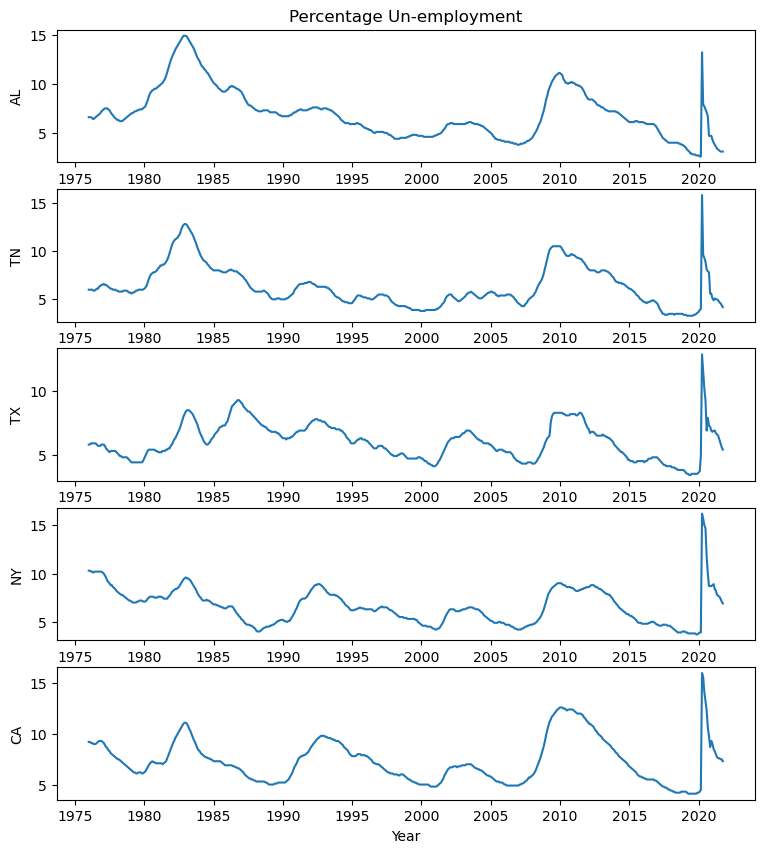

In [ ]:
# various imports of libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ask matplotlib to plot in notebooks
%matplotlib inline

# setting up plot sizes
width_inches = 9
subplot_height_inches = 2

# where is our data?
baseurl = "https://raw.githubusercontent.com/univai-ghf/ghfmedia/main/"

# defining a function to load and clean unemployment data
def get_unemployment_data(state_abbrev):
    # fetch and read csv file into a dataframe
    data = pd.read_csv(baseurl+"data/"+state_abbrev+"UR.csv")
    # convert date to a python datetime object
    data['DATE'] = pd.to_datetime(data['DATE'])
    return data

# creating a dictionary the hold the data, with
# the lookup keys being the state abbreviations
states = ['AL', 'TN', 'TX', 'NY', 'CA']
state_data=dict()
for abbrev in states:
    state_data[abbrev] = get_unemployment_data(abbrev)
    
# plotting the data    

# create as many subplots as we have states
fig, ax = plt.subplots(nrows=len(states), 
                       figsize = (width_inches, subplot_height_inches*len(states)))

counter = 0
for state_abbrev in states:
    # get daraframe from dictionary
    data = state_data[state_abbrev]
    # plot the data
    ax[counter].plot(data['DATE'], data[state_abbrev+'UR'])
    # label which state it is
    ax[counter].set_ylabel(state_abbrev)
    counter = counter + 1
# Year label only below last subplot
ax[4].set_xlabel("Year")

# title only on first subplot
ax[0].set_title("Percentage Un-employment");

## 2. Libraries and Functions

If all python did was to provide a calculator with variables that would not be very ineresting. We want to have access to pre-made **libraries** of functionality!

### Libraries

At the beginning of this notebook we defined some strange looking symbols:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

These are **imports** of **libraries** in the python ecosystem. They are also called **modules**. Having to write all of our code ourselves is no fun! Whats the whole point if we cant use code others have written for us?

These imports allow us to use existing libraries. More precisely they allow us to use functions defined by others in these libraries. 

For example, we can say:

```python
import pandas
df = pandas.read_csv("somefile.csv") # Use a function from the library
```

or use `as` to provide a short form for the library name:
```python
import pandas as pd
df = pd.read_csv("somefile.csv")
```

But what IS a function, exactly?

Combine with `if` to filter out some elements:

### Functions

A function is an **encapsulated** set of statements that take input, do some specific computation and produce output.

There are many ways to define functions:

- Functions can be built-in to python
- Functions can imported from an existing Python Library, including libraries you have installed
- A function can be user defined
- A function can be anonymous
- functions can belong to objects. These functions are called **methods**.

Properties of functions:

- A function can be called from other functions
- Can return data, or even other functions

![](https://github.com/hult-cm3-rahul/LearningPython/raw/main/images/runfuncs.png)

In [ ]:
# Built-in functions

var1 = -15
abs(var1)

Here are the two different ways of importing a function from a module.

In [ ]:
import os
os.cpu_count()

The special `from` syntax allows us to import just one function:

In [ ]:
from math import sqrt
sqrt(4)

Functions are not the only thing we can import: pre-defined variables representing constants or other objects (like a database connection) may be imported as well.

```python
import math
print(math.pi)
```

One can even import a single variable from a library, using the `from` syntax:

In [ ]:
from math import pi

Now let us **define our own function**:

In [ ]:
def circle_area(radius):
    area = pi*radius*radius
    return area
circle_area(10)

Notice the **indentation** of the function body, just as we did with conditional blocks....

One can define **anonymous functions** and assign them to variables:

In [ ]:
from math import sqrt
hypot = lambda x, y: sqrt(x*x + y*y) # imported from math
hypot(3,4)

In data science these are often used to define one-line math functions...

Functions can have default values which the function may be used without...

In [ ]:
def register(name, affiliation="Student"):
    print(f"{name} is a {affiliation}")

In [ ]:
register("Rahul", affiliation="Teacher")

Rahul is a Teacher


In [ ]:
register("John")

John is a Student


## The scope of variables in functions

- Scope of a variable is the portion of a program where the variable is recognized. Parameters and variables defined inside a function is not visible from outside. Hence, they have a local scope, also called a Lexical scope: you can see it from seeing the code.

- Lifetime of a variable is the period throughout which the variable exits in the memory. The lifetime of variables inside a function is as long as the function executes.

- They are destroyed once we return from the function. Hence, a function does not remember the value of a variable from its previous calls.

The scope of this jupyter notebook, or in a python file, is the global scope. The scope defined inside of a function definition is the local scope.

Here is an example to illustrate the scope of a variable inside a function.

In [ ]:
def my_func():
    x = 10
    print("Value inside function:",x)

x = 20
my_func()
print("Value outside function:",x)

Value inside function: 10
Value outside function: 20


In this way, a variable defined locally can shadow a global. Here the value x inside `my_func` comes from the local definition (10), not the global one (20)

##Functions are First Class objects

This means that functions can act as objects, and thus be represented as variables. For example:

In [ ]:
square = lambda x: x*x

The further meaning of this is that you can return functions from functions just as you return variables, and pass functions into functions, just as you would pass variables. This means that you can achieve very general functionality easily.

In [ ]:
def sum_of_squares(x, y):
    return x*x + y*y
sum_of_squares(3, 4)

25

In [ ]:
def sum_of_cubes(x, y):
    return x*x*x + y*y*y
sum_of_cubes(3, 4)

91

Does this seem repetitive? You could instead do:

In [ ]:
def sum_of_anything(f, x, y):
    return f(x)
sum_of_anything(square, 3, 4)

9

But python goes further! You can define functions inside of functions and return your defined functions..this is the other side of the coin of taking functions of arguments..you can return them as well. This further expands the menu of things you can do. For example:

In [ ]:
def soa(f): # sum anything, this returns a function
    def h(x, y):
        return f(x) + f(y)
    return h 

Here we are writung a function soa that takes a function f as an argument, and returns a function h, which when executed takes two imputs, puts them through f, and then sums them. So:

In [ ]:
sum_of_squares = soa(square)
type(sum_of_squares)

function

In [ ]:
sum_of_squares(3,4)

25

These abilities are behind a very important branch of programming called **Functional Programming**, which we will talk about later!

## CODING EXERCISE

Here is a list of x-values, the deviations from the mean temperature of a mechanical device. The corresponding y-values are failures. Plotted, they look like this:

![](https://github.com/hult-cm3-rahul/LearningPython/raw/main/images/failures.png)

In [ ]:
xvals = [-2.022945287808054, -1.8486091760122103, -1.8476481826866842, -1.7435854332654428, 
         -1.5282423673888716, -1.3945778557109074, -1.1403979924220742, -0.8009077275459544,
         -0.7108560219444477, -0.5638678812593274, -0.43048994749879754, -0.4265240230310121,
         -0.23456806947264375, -0.08933017942095312, 0.04091978204507629, 0.5542534388866378,
         0.5558786314354511, 0.8006640938973202, 1.2144534202678483, 1.9118026057089639]
y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]

Future you has run a machine learning model and come up with the following parameters called slope and intercept:

In [ ]:
slope, intercept = (9.812037170985635, 5.175316482607568) 

This syntax is called the destructuring of another kind of list, called a tuple.

1. Implement an anonymous or other function to calculate the probability of failure $p(x)$:

$$p(x) = \frac{1}{1+e^{-(b + m x)}}$$

where $m$ is the slope and $b$ is the intercept. Use the function you defined to create an array `probs` of the probability of failures at the 20 temperatures above

In [ ]:
from math import exp
# your code here


2. Use these probabilities to make classifications at each of these 20 x-values in a new list `classi`. A data point is classified as a failure if the probability of failure $p(x)$ is greater than or equal to the probability of not failing (which is $1 - p(x)$). Compare these to the $y$ values in the data set to report the fraction of correctly classified failures (an element in `classi` is equal to the corresponding element in $y$) from the model. (you will need to create a counter which you increment to track the total number of correctly classified data points.

In [ ]:
1*False

0

In [ ]:
# your code here
# for this you will need to compare p(x) >= 1 - p(x). This will give booleans True or False. 
# Multiply the result of the comparision by 1 as above to convert to a number 1 or 0. Then
# see if the result is the same as in the y array ny using == to test whether the result is equal to
# a particular y.
